In [304]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

drugtrial_df = pd.merge(drug_df, trial_df, on="Mouse ID")

# Display the data table for preview

drugtrial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [153]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Avg_Tumor_Volume = drugtrial_df.groupby(["Drug", "Timepoint"]).mean()
Avg_Tumor_Volume = Grouped_Drug.drop("Metastatic Sites", axis=1)
# Convert to DataFrame
Avg_Tumor_Volume = Avg_Tumor_Volume.reset_index()
# Preview DataFrame
Avg_Tumor_Volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [351]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Standard_Error = Avg_Tumor_Volume.sem(axis = 1)

# # Convert to DataFrame
Avg_Tumor_Volume["SEM"] = Standard_Error
# Grouped_Drugs = pd.DataFrame(STD_Tumors)
# # Preview DataFrame
Avg_Tumor_Volume.head(15)


,Drug,Timepoint,Tumor Volume (mm3),SEM
0,Capomulin,0,45.000000,12.990381
1,Capomulin,5,44.266086,11.457017
2,Capomulin,10,43.084291,10.115597
3,Capomulin,15,42.064317,9.275763
4,Capomulin,20,40.716325,8.955908
5,Capomulin,25,39.939528,9.383153
6,Capomulin,30,38.769339,10.315447
7,Capomulin,35,37.816839,11.694970
8,Capomulin,40,36.958001,12.350592
9,Capomulin,45,36.236114,12.340810


In [352]:
# Minor Data Munging to Re-Format the Data Frames
Table = Avg_Tumor_Volume.pivot_table(index="Timepoint", values="Tumor Volume (mm3)", columns="Drug")
# Preview that Reformatting worked
Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


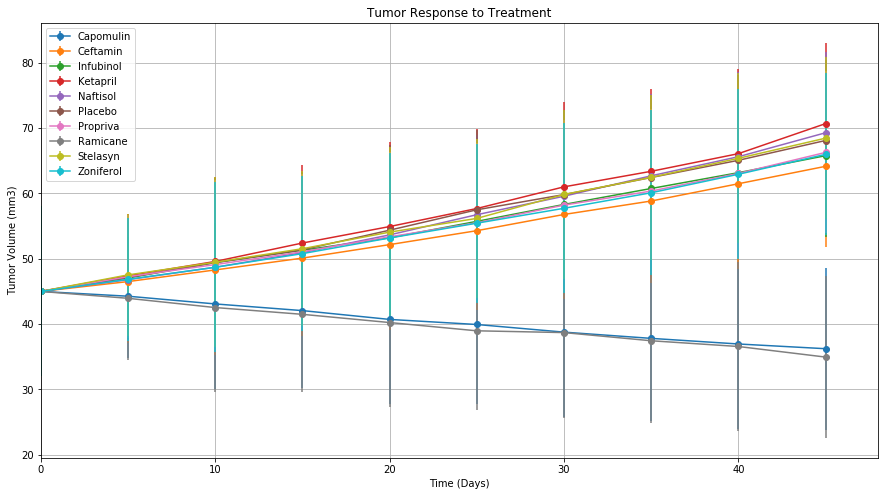

In [353]:
# Generate the Plot (with Error Bars)
ax = Table.plot(title="Tumor Response to Treatment", marker="o", yerr=Avg_Tumor_Volume["SEM"], grid=True, xlim=(0,48), figsize=(15,8))

ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig('Tumor_Responses.png')

## Metastatic Response to Treatment

In [305]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Metastatic_Sites = drugtrial_df.groupby(["Drug", "Timepoint"]).mean()
Metastatic_Sites = Metastatic_Sites.drop("Tumor Volume (mm3)", axis=1)
# Convert to DataFrame
Metastatic_Sites = Metastatic_Sites.reset_index()
# Preview DataFrame
Metastatic_Sites.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [306]:

# Minor Data Munging to Re-Format the Data Frames
Table = Metastatic_Sites.pivot_table(index="Timepoint", values="Metastatic Sites", columns="Drug")
# Preview that Reformatting worked
Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


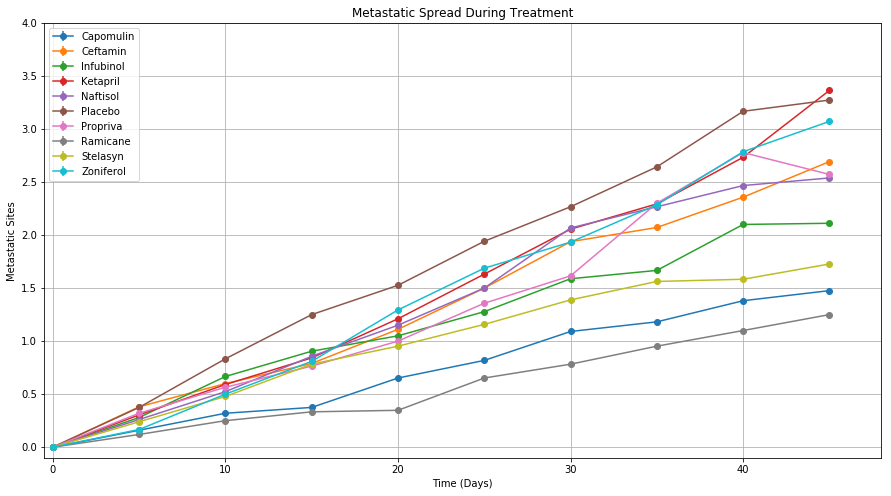

In [316]:
# Generate the Plot (with Error Bars)
ax = Table.plot(title="Metastatic Spread During Treatment",marker="o", yerr=False, grid=True, ylim=(-0.1,4), xlim=(-0.5,48), figsize=(15,8))

ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")

# Save the Figure
plt.savefig('Metastatic_Sites.png')

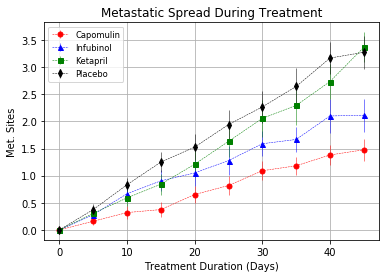

## Survival Rates

In [338]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
Mouse_Count = drugtrial_df.groupby(["Drug", "Timepoint"]).count()
Mouse_Count = Mouse_Count.drop(["Metastatic Sites","Tumor Volume (mm3)"], axis=1)

# Convert to DataFrame
Mouse_Count = Mouse_Count.reset_index()
# Preview DataFrame
Mouse_Count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [339]:
# # Minor Data Munging to Re-Format the Data Frames
# Table = Mouse_Count.pivot_table(index="Timepoint", values="Mouse ID", columns="Drug")
# # Preview that Reformatting worked
# Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [344]:
Table2 = (100. * Table / Table.sum()).round(0)
Table2.head

<bound method NDFrame.head of Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0               11.0      14.0       14.0      13.0      13.0     14.0   
5               11.0      12.0       14.0      12.0      12.0     13.0   
10              11.0      11.0       12.0      12.0      11.0     13.0   
15              10.0      11.0       12.0      10.0      11.0     11.0   
20              10.0      10.0       11.0      10.0      11.0     10.0   
25              10.0      10.0       10.0      10.0      10.0      9.0   
30              10.0       9.0       10.0      10.0       8.0      8.0   
35              10.0       8.0        7.0       9.0       8.0      8.0   
40               9.0       8.0        6.0       8.0       8.0      7.0   
45               9.0       7.0        5.0       6.0       7.0      6.0   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                   

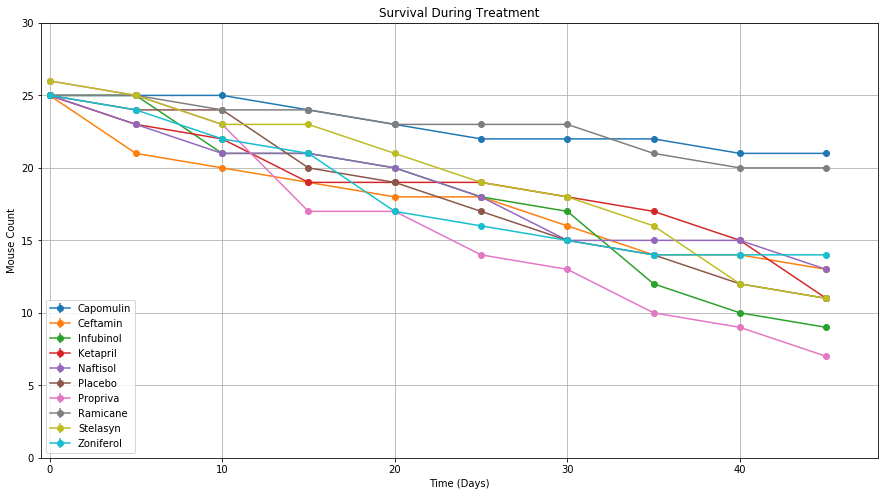

In [342]:
# Generate the Plot (with Error Bars)
ax = Table.plot(title="Survival During Treatment",marker="o", yerr=False, grid=True, ylim=(0,30), xlim=(-0.5,48), figsize=(15,8))

ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mouse Count")

# Save the Figure
plt.savefig('Survival Rate.png')

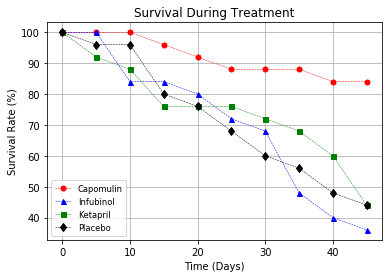

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

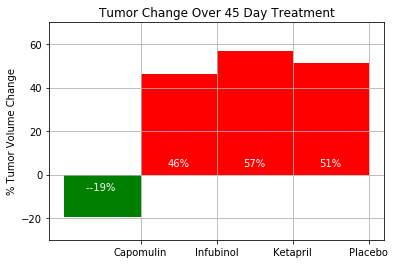